In [127]:
%load_ext autoreload
%autoreload 2
% pylab inline

pylab.rcParams['figure.figsize'] = (15, 6)

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import seaborn as sns

sns.set_style("darkgrid")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


 /Users/tmpethick/anaconda3/envs/eth/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning:pylab import has clobbered these variables: ['plot']
`%matplotlib` prevents importing * from pylab and numpy


Optimization terminated successfully.
         Current function value: 145.658771
         Iterations: 121
         Function evaluations: 264


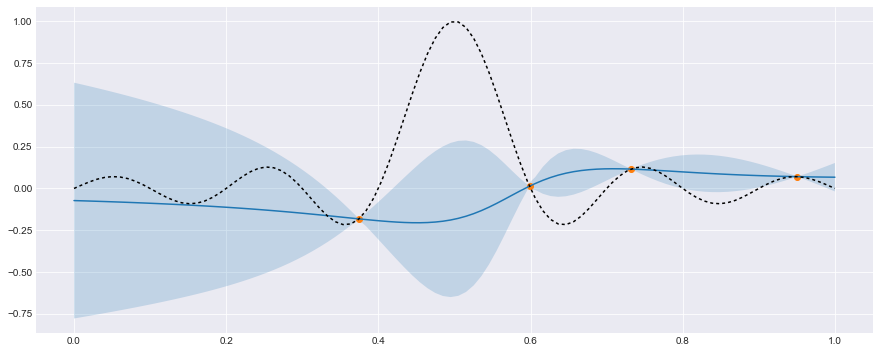

In [128]:
from src.bo import *
from src.dngo import *
from src.acquisition_functions import EI, UCB

def f(x):
    return np.sinc(x * 10 - 5).sum(axis=1)[:, None]

rng = np.random.RandomState(42)
x_train = rng.uniform(0, 1, 4)[:, None]
y_train = f(x_train)

################

nn = TFModel(input_dim=1, dim_basis=50, epochs=1000, batch_size=10)
reg = BayesianLinearRegression(num_mcmc=0, burn_in=1000, mcmc_steps=1000)
model = BOModel(nn, regressor=reg)
model.init(x_train, y_train)

x = (np.linspace(0, 1, 100))[:,None]
y = f(x)
model.plot_prediction(x,y)

Optimization terminated successfully.
         Current function value: 134.002920
         Iterations: 78
         Function evaluations: 175


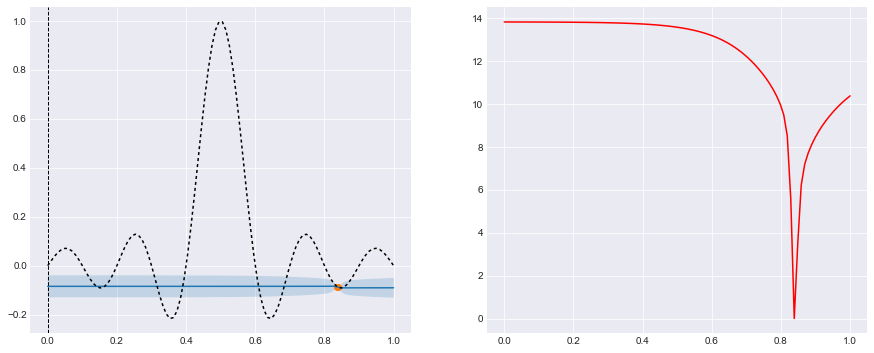

Optimization terminated successfully.
         Current function value: 141.905499
         Iterations: 67
         Function evaluations: 142


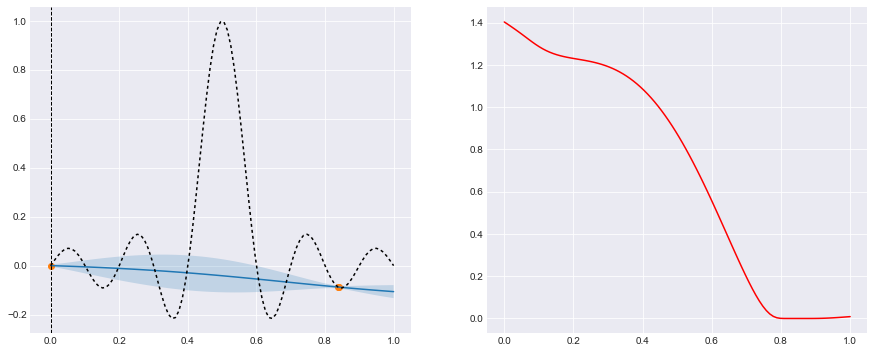

Optimization terminated successfully.
         Current function value: 141.075454
         Iterations: 103
         Function evaluations: 219


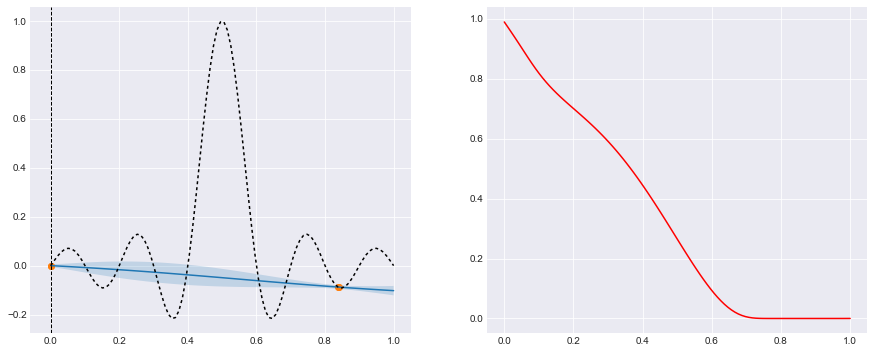

Optimization terminated successfully.
         Current function value: 139.911518
         Iterations: 81
         Function evaluations: 177


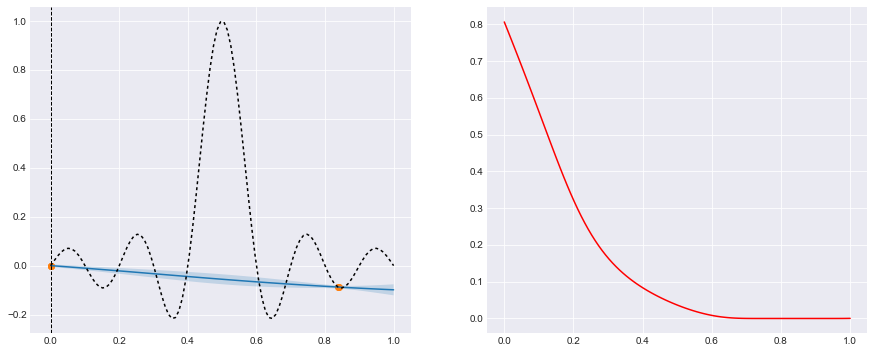

Optimization terminated successfully.
         Current function value: 138.312984
         Iterations: 107
         Function evaluations: 220


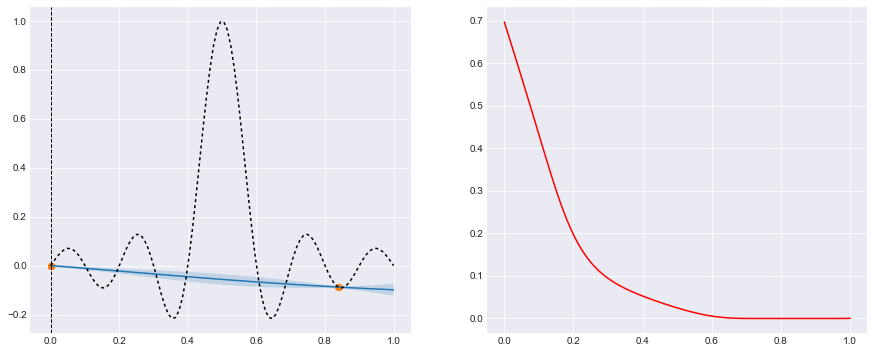

Optimization terminated successfully.
         Current function value: 137.541974
         Iterations: 131
         Function evaluations: 283


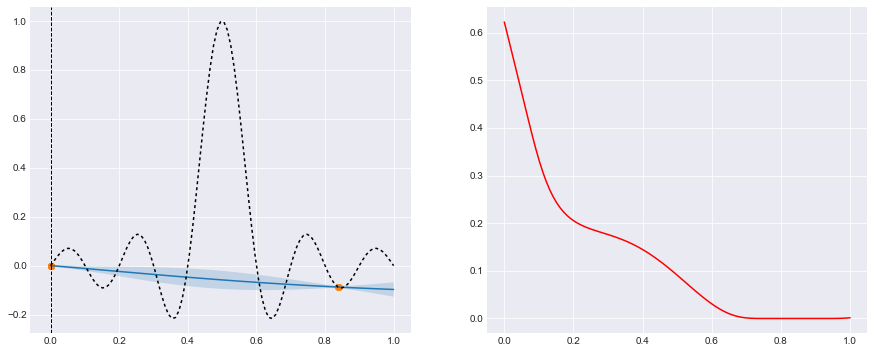

Optimization terminated successfully.
         Current function value: 136.090784
         Iterations: 138
         Function evaluations: 286


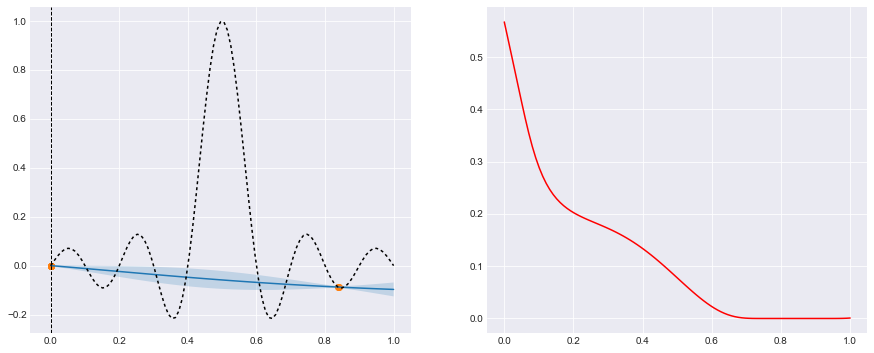

Optimization terminated successfully.
         Current function value: 135.311227
         Iterations: 97
         Function evaluations: 213


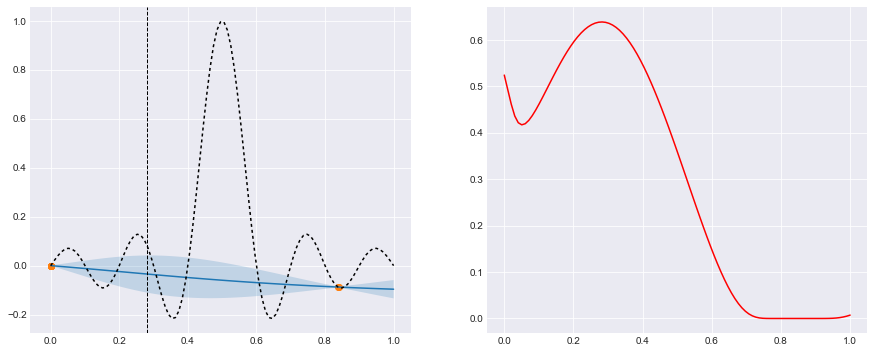

 /Users/tmpethick/GoogleDrive/dtu/8-5-ETH-summer/eth-project/src/priors.py:24: RuntimeWarning:divide by zero encountered in log
 /Users/tmpethick/anaconda3/envs/eth/lib/python3.6/site-packages/scipy/optimize/optimize.py:563: RuntimeWarning:invalid value encountered in subtract


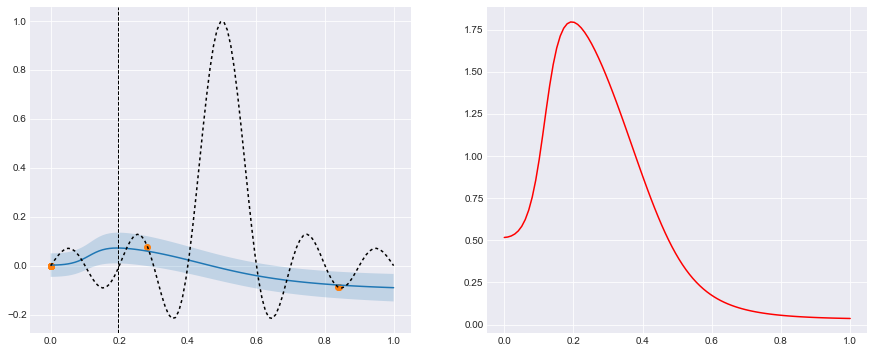

Optimization terminated successfully.
         Current function value: 149.962550
         Iterations: 64
         Function evaluations: 142


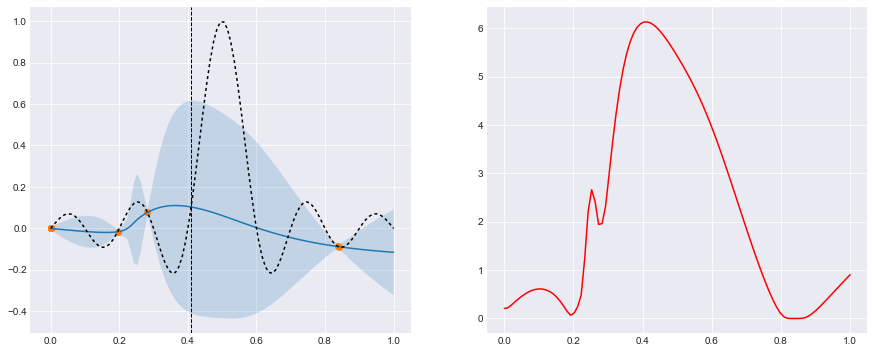

Optimization terminated successfully.
         Current function value: 148.658373
         Iterations: 64
         Function evaluations: 140


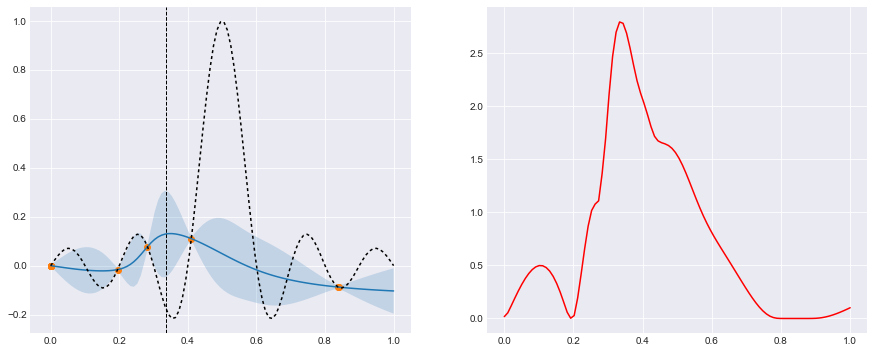

Optimization terminated successfully.
         Current function value: 151.997583
         Iterations: 60
         Function evaluations: 141


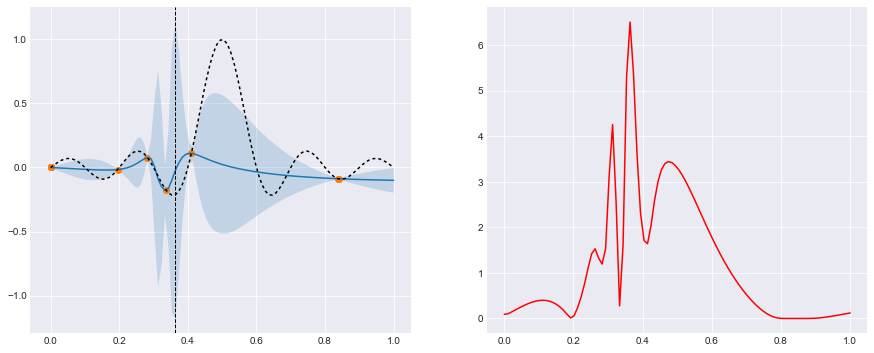

Optimization terminated successfully.
         Current function value: 181.219403
         Iterations: 67
         Function evaluations: 166


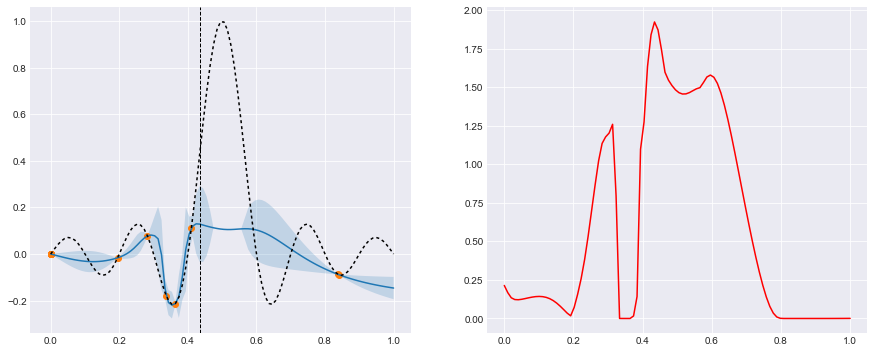

Optimization terminated successfully.
         Current function value: 146.387291
         Iterations: 60
         Function evaluations: 146


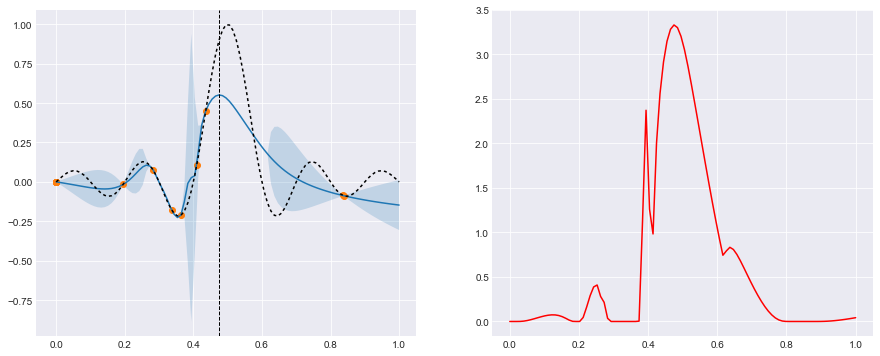

Optimization terminated successfully.
         Current function value: 162.391339
         Iterations: 70
         Function evaluations: 156


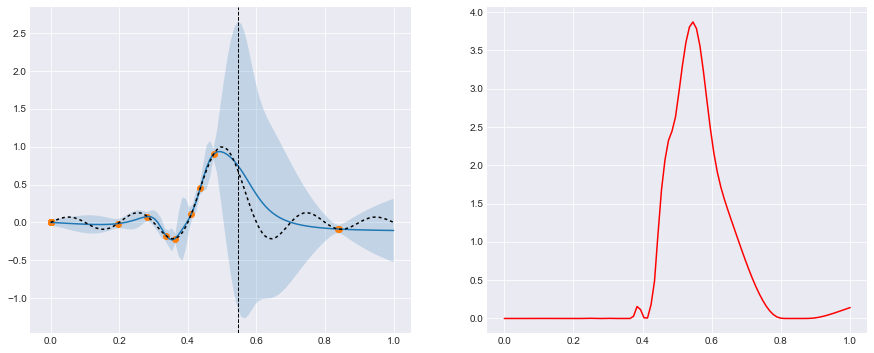

Optimization terminated successfully.
         Current function value: 149.496699
         Iterations: 102
         Function evaluations: 233


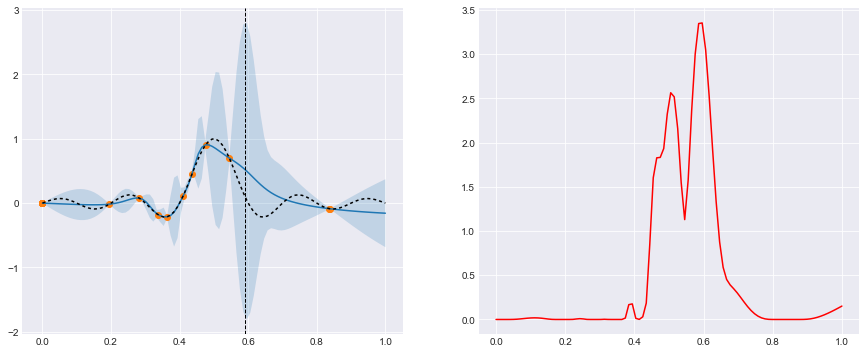

Optimization terminated successfully.
         Current function value: 160.730599
         Iterations: 67
         Function evaluations: 153


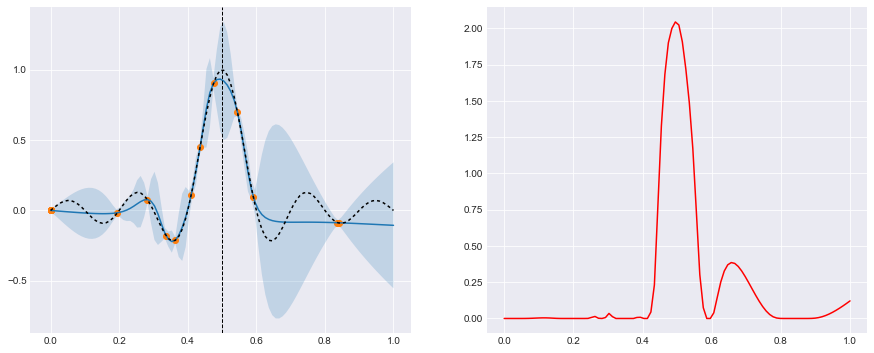

Optimization terminated successfully.
         Current function value: 153.015430
         Iterations: 59
         Function evaluations: 155


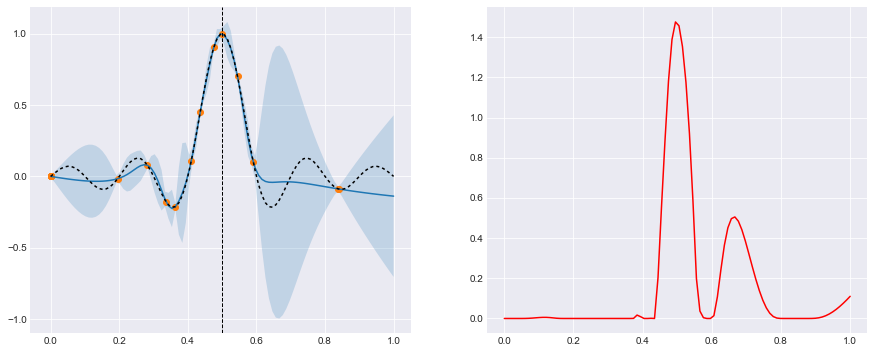

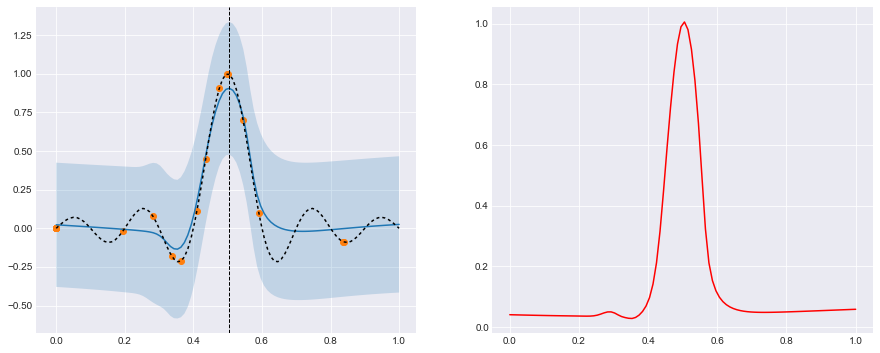

Optimization terminated successfully.
         Current function value: 154.251199
         Iterations: 61
         Function evaluations: 145


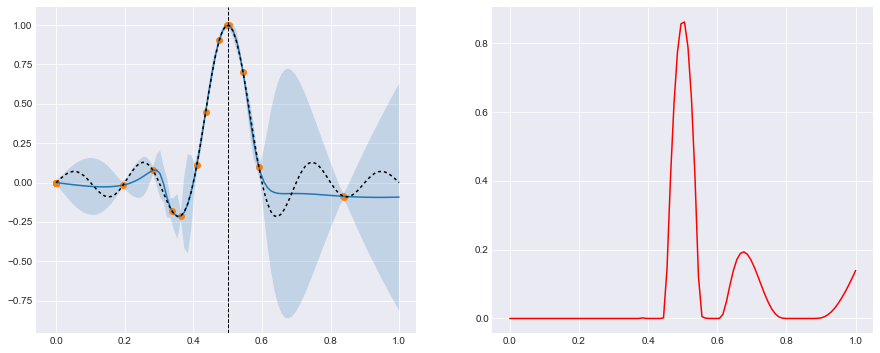

Optimization terminated successfully.
         Current function value: 166.010377
         Iterations: 61
         Function evaluations: 138


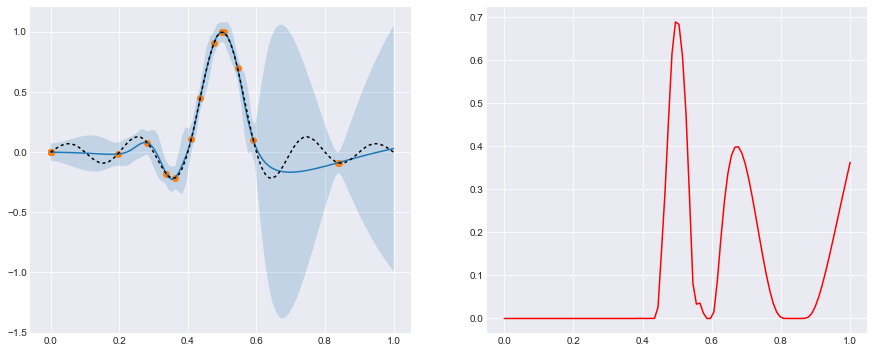

In [6]:
acq = EI(model, par=0.01)
# acq = UCB(model)
bo = BO(f, model, acquisition_function=acq, n_iter=20, bounds=np.array([[0,1]]))
bo.run()

In [135]:
from hpolib.benchmarks.synthetic_functions import Branin

from src.bo import random_hypercube_samples, vectorize

branin = Branin()
info = branin.get_meta_information()
bounds = np.array(info['bounds'])
nbranin = lambda x: -branin(x)
f = vectorize(nbranin)

In [136]:
# Random sample
samples = random_hypercube_samples(100, bounds)
values = f(samples)
values[np.argmax(values)]

array([-0.41628336])

Optimization terminated successfully.
         Current function value: 133.681353
         Iterations: 81
         Function evaluations: 184


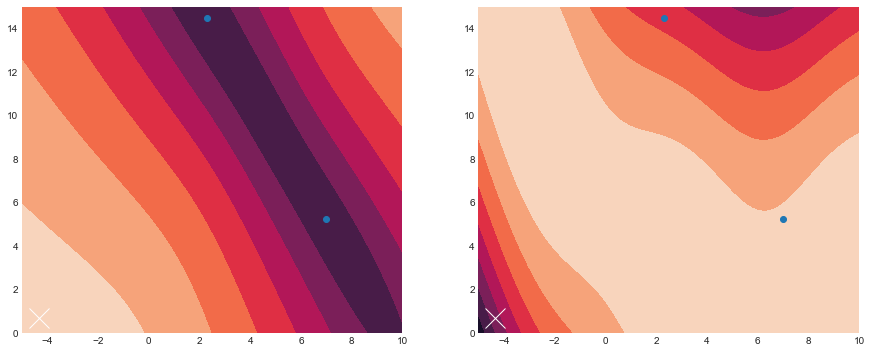

Optimization terminated successfully.
         Current function value: 144.227487
         Iterations: 67
         Function evaluations: 143


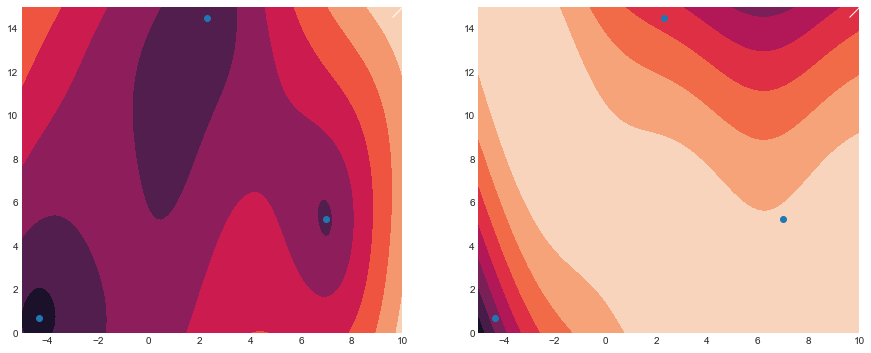

Optimization terminated successfully.
         Current function value: 150.845150
         Iterations: 68
         Function evaluations: 148


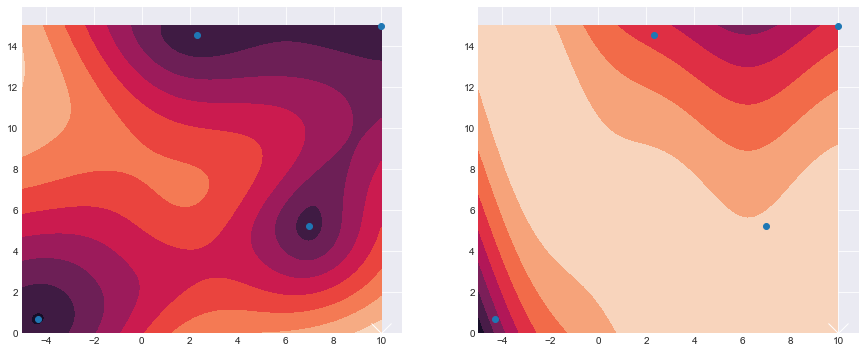

Optimization terminated successfully.
         Current function value: 262.339030
         Iterations: 70
         Function evaluations: 166


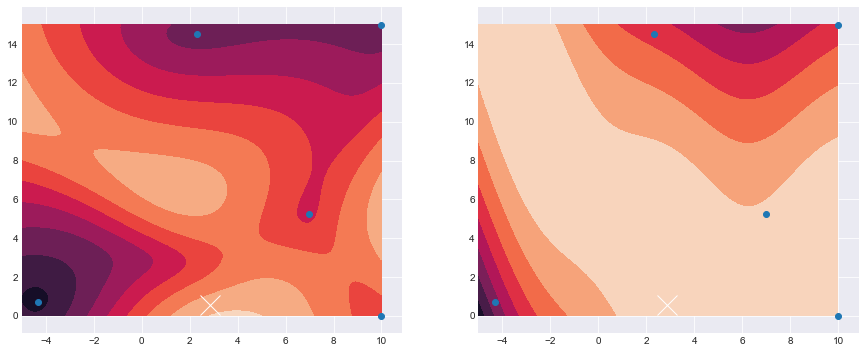

 /Users/tmpethick/GoogleDrive/dtu/8-5-ETH-summer/eth-project/src/priors.py:24: RuntimeWarning:divide by zero encountered in log
 /Users/tmpethick/GoogleDrive/dtu/8-5-ETH-summer/eth-project/src/priors.py:24: RuntimeWarning:overflow encountered in exp
 /Users/tmpethick/GoogleDrive/dtu/8-5-ETH-summer/eth-project/src/priors.py:24: RuntimeWarning:divide by zero encountered in double_scalars
 /Users/tmpethick/GoogleDrive/dtu/8-5-ETH-summer/eth-project/src/priors.py:24: RuntimeWarning:overflow encountered in double_scalars
 /Users/tmpethick/anaconda3/envs/eth/lib/python3.6/site-packages/scipy/optimize/optimize.py:563: RuntimeWarning:invalid value encountered in subtract


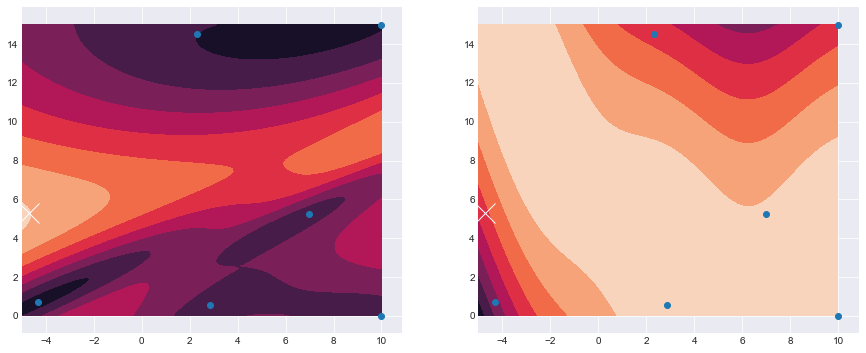

Optimization terminated successfully.
         Current function value: 162.075916
         Iterations: 65
         Function evaluations: 142


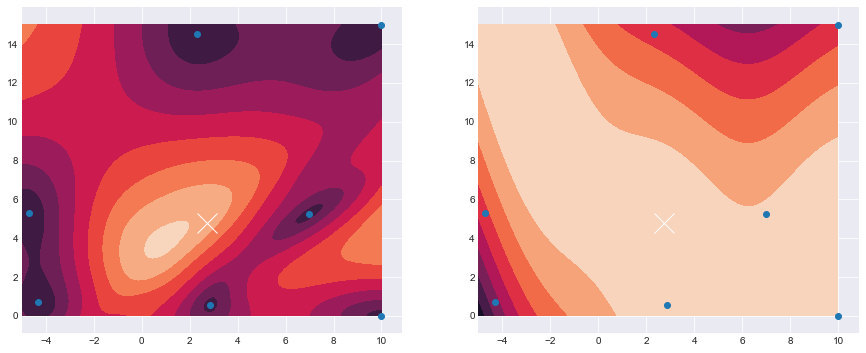

Optimization terminated successfully.
         Current function value: 165.662610
         Iterations: 75
         Function evaluations: 173


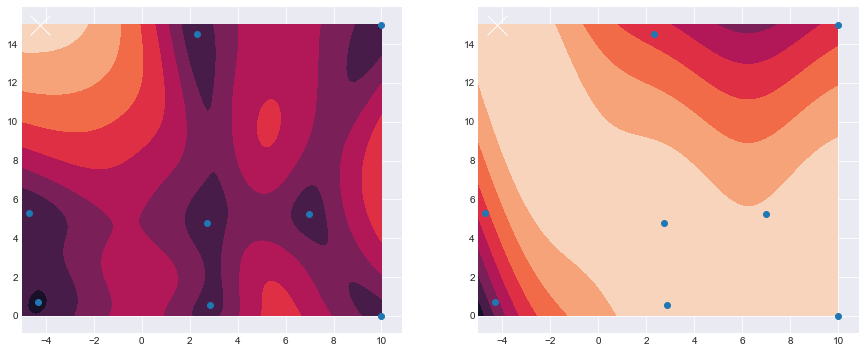

Optimization terminated successfully.
         Current function value: 191.031524
         Iterations: 58
         Function evaluations: 144


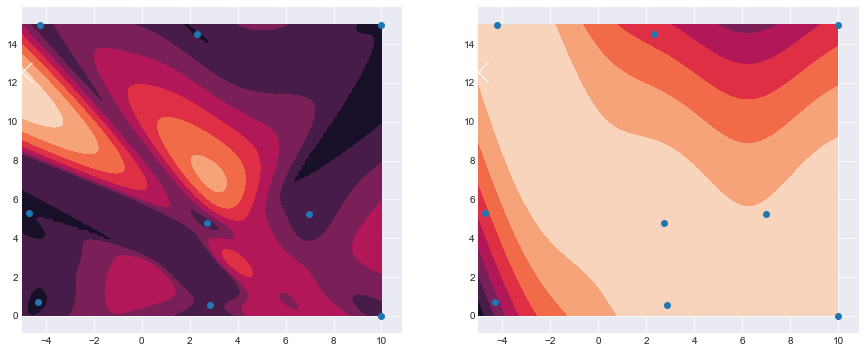

Optimization terminated successfully.
         Current function value: 168.935217
         Iterations: 68
         Function evaluations: 155


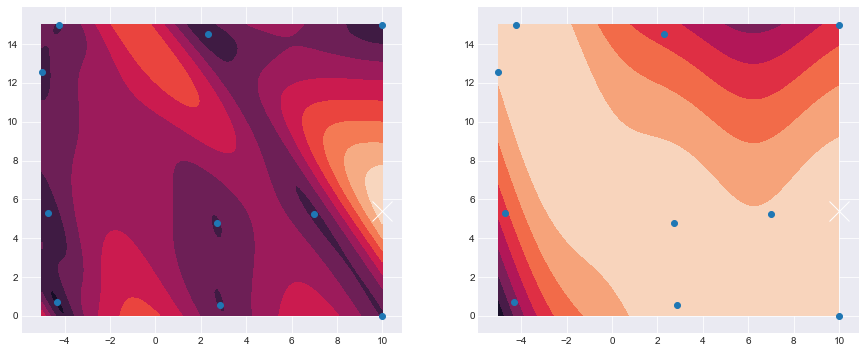

Optimization terminated successfully.
         Current function value: 174.425298
         Iterations: 57
         Function evaluations: 146


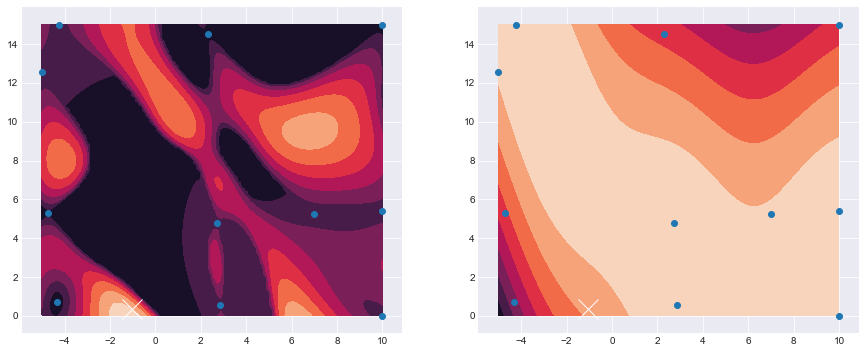

Optimization terminated successfully.
         Current function value: 177.509441
         Iterations: 65
         Function evaluations: 146


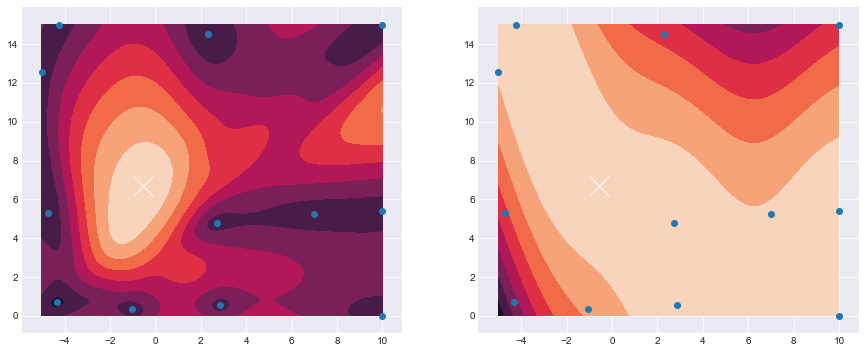

Optimization terminated successfully.
         Current function value: 178.783430
         Iterations: 64
         Function evaluations: 148


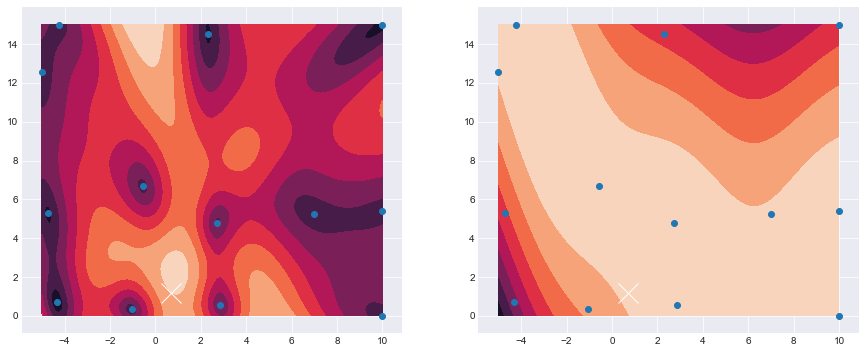

Optimization terminated successfully.
         Current function value: 184.376984
         Iterations: 62
         Function evaluations: 145


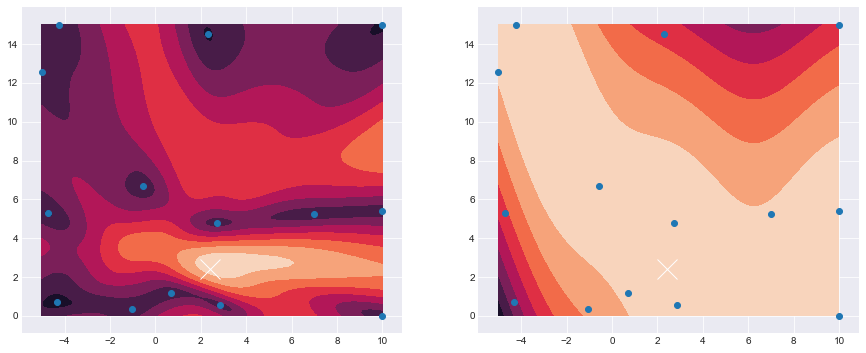

Optimization terminated successfully.
         Current function value: 188.068008
         Iterations: 71
         Function evaluations: 153


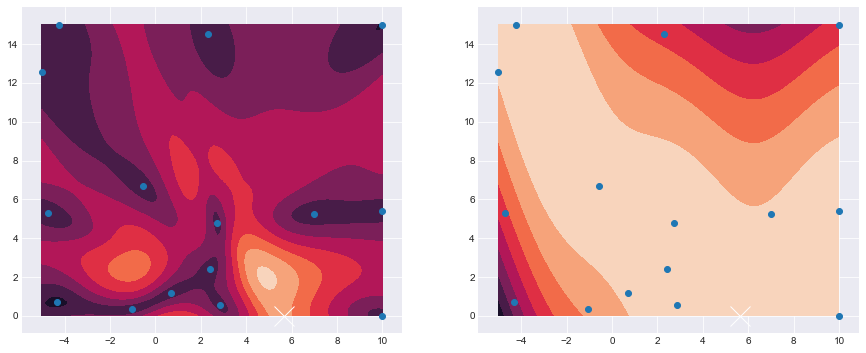

Optimization terminated successfully.
         Current function value: 188.977922
         Iterations: 80
         Function evaluations: 173


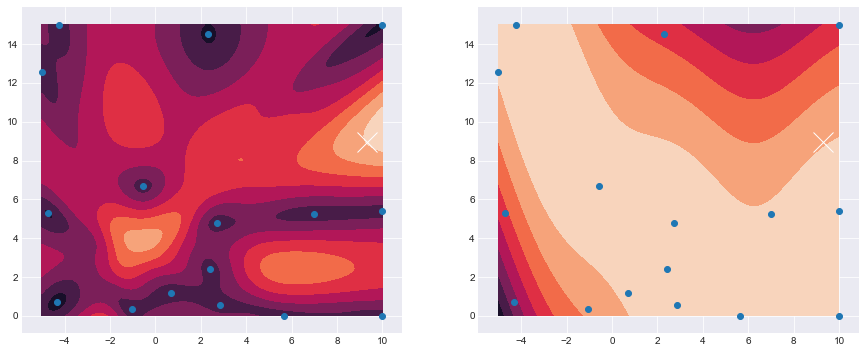

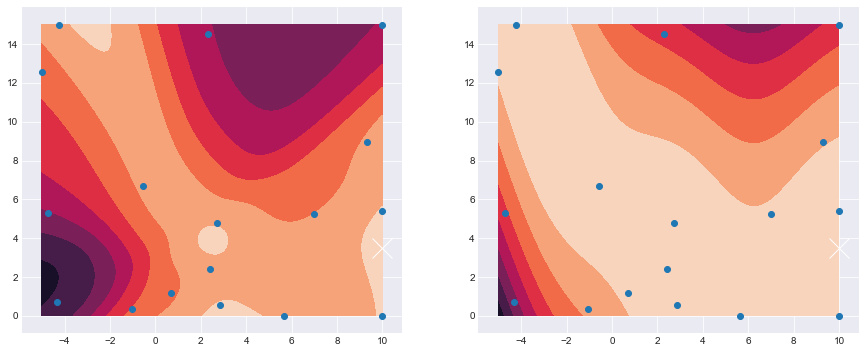

Optimization terminated successfully.
         Current function value: 188.013377
         Iterations: 90
         Function evaluations: 213


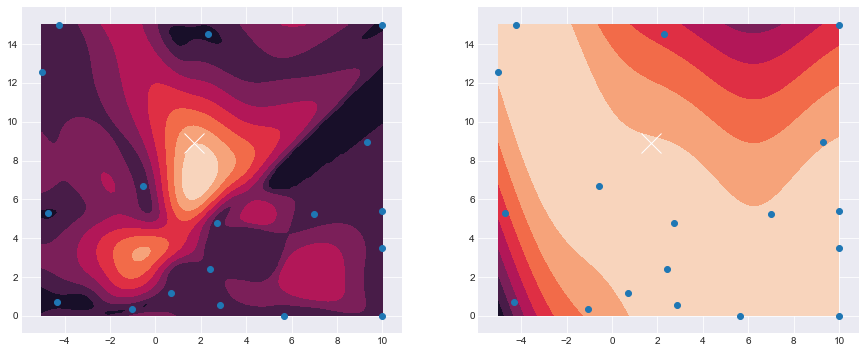

Optimization terminated successfully.
         Current function value: 191.337669
         Iterations: 69
         Function evaluations: 154


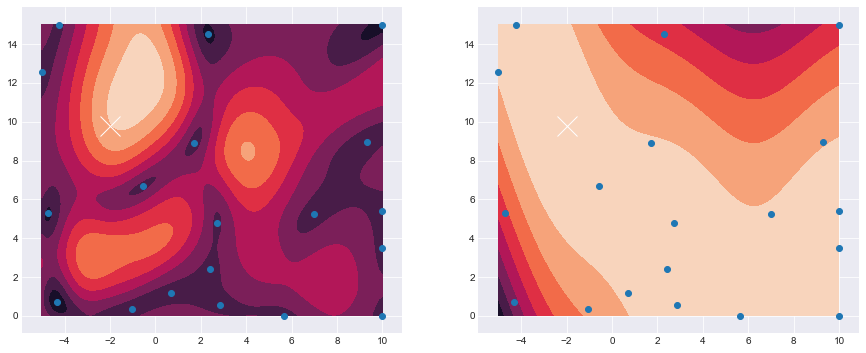

Optimization terminated successfully.
         Current function value: 201.119796
         Iterations: 58
         Function evaluations: 124


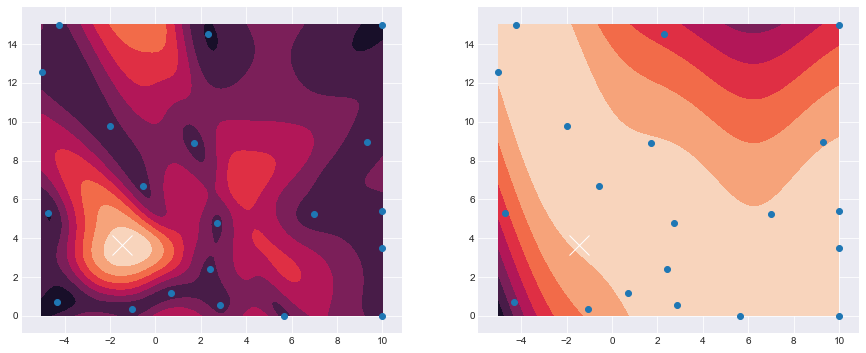

Optimization terminated successfully.
         Current function value: 196.403944
         Iterations: 61
         Function evaluations: 146


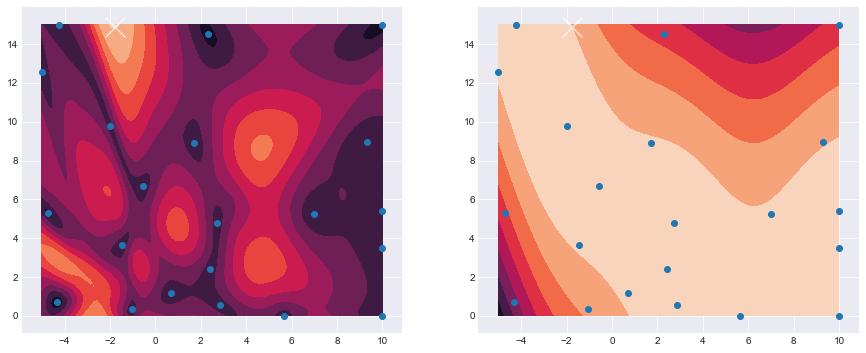

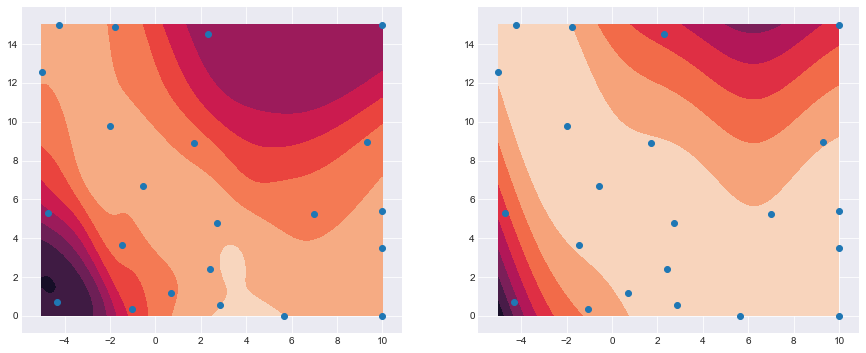

(array([ 10.        ,   3.50614516]), array([-2.19633938]))

In [137]:
input_dim = bounds.shape[0]
nn = TFModel(input_dim=input_dim, dim_basis=50, epochs=1000, batch_size=10)
reg = BayesianLinearRegression(num_mcmc=0, burn_in=1000, mcmc_steps=1000)
model = BOModel(nn, regressor=reg)
# acq = EI(model, par=0.01)
acq = UCB(model)
bo = BO(f, model, acquisition_function=acq, n_iter=20, bounds=bounds)
bo.run(do_plot=True)
bo.model.get_incumbent()

In [138]:
fig = bo.plot_2D_surface(use_plotly=True)
iplot(fig)

This is the format of your plot grid:
[ (1,1) scene1 ]  [ (1,2) scene2 ]
[ (2,1) scene3 ]  [ (2,2) scene4 ]



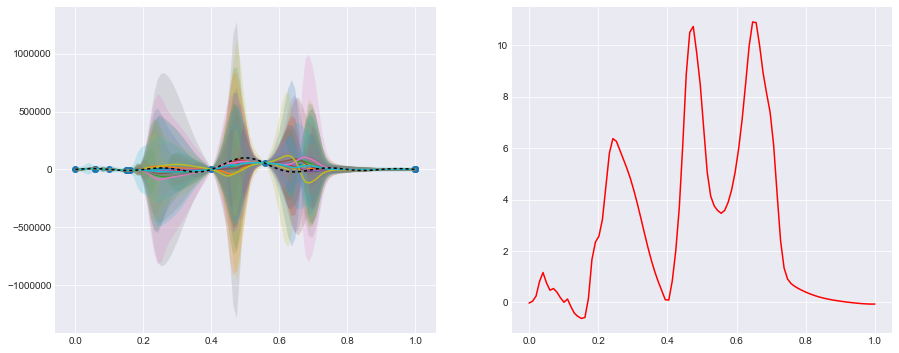

In [15]:
bo.plot_prediction()